<a href="https://colab.research.google.com/github/YasithKirihena/Telco-Customer-Churn/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3851867106.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='pastel')


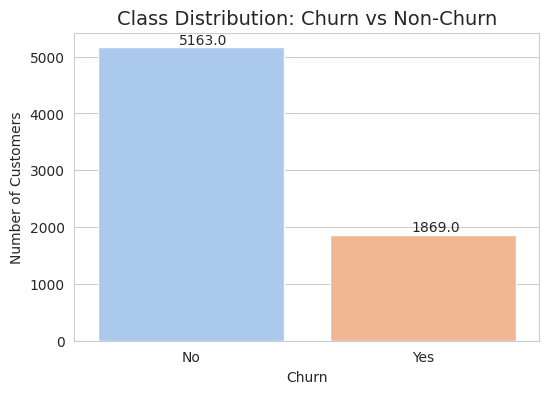

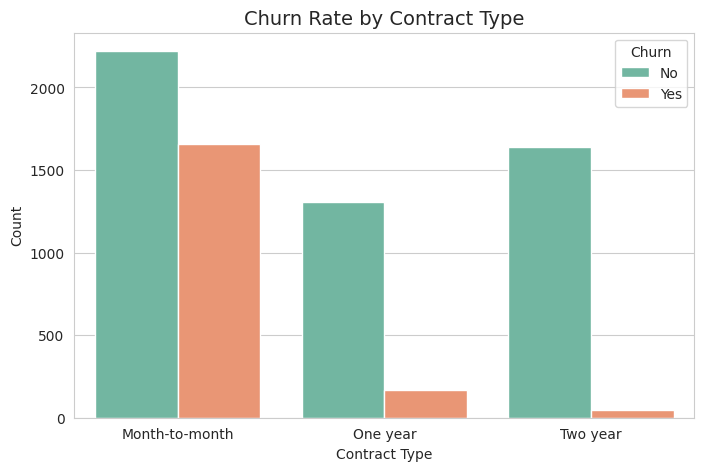

/tmp/ipython-input-3851867106.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


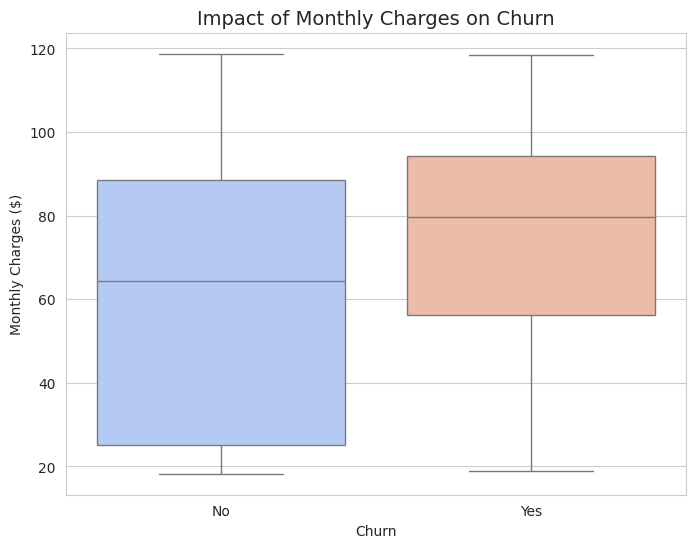

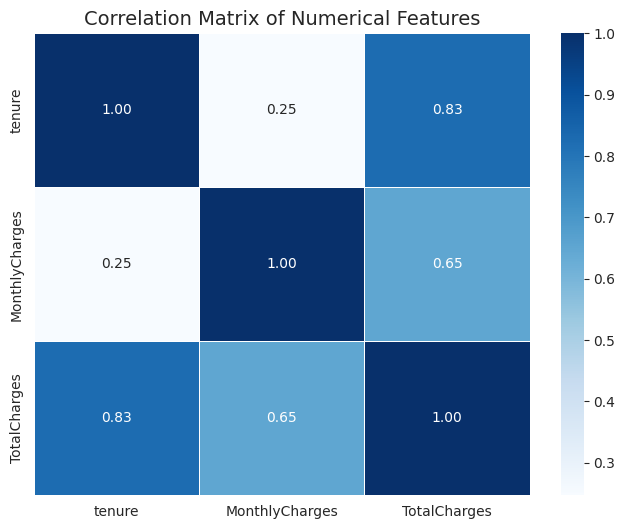

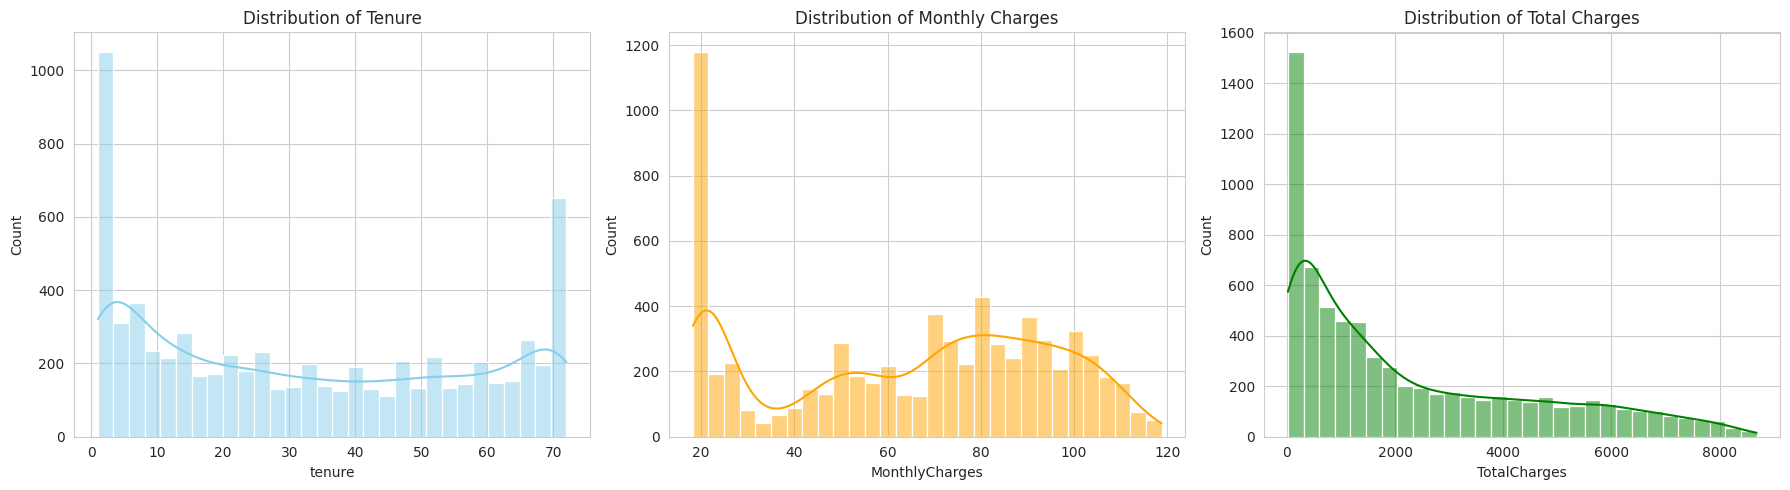

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')


# --- Exploratory Analysis ---

# 1. Check for Class Imbalance
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Churn', data=telco_data, palette='viridis')
plt.title('Target Variable Distribution (Churn)')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.35, p.get_height() + 20))
plt.show()


# 2. Analyzing Contracts
plt.figure(figsize=(9, 5))
sns.countplot(x='Contract', hue='Churn', data=telco_data, palette='husl')
plt.title('Churn by Contract Type')
plt.show()


# 3. Financial Impact (Monthly Charges)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_data, palette='Reds')
plt.title('Monthly Charges vs. Churn Status')
plt.show()


# 4. Correlation Check
plt.figure(figsize=(8, 6))
cols_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = telco_data[cols_to_check].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# 5. Distribution of Numerical Features
fig, ax_arr = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(telco_data['tenure'], bins=30, kde=True, ax=ax_arr[0], color='teal')
ax_arr[0].set_title('Tenure Histogram')

sns.histplot(telco_data['MonthlyCharges'], bins=30, kde=True, ax=ax_arr[1], color='purple')
ax_arr[1].set_title('Monthly Charges Histogram')

sns.histplot(telco_data['TotalCharges'], bins=30, kde=True, ax=ax_arr[2], color='salmon')
ax_arr[2].set_title('Total Charges Histogram')

plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ---(2.1)PREPROCESSING--- #

df.drop('customerID', axis=1, inplace=True) #customerID not needed

# Binary Columns
le = LabelEncoder()
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Categorial Columns
df = pd.get_dummies(df, drop_first=True) #dummy columns

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% Training / 20% Testing

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (5625, 30)
Testing Data Shape: (1407, 30)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# --- (2.2)Decision Tree --- #

print("\n Training Decision Tree ")
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [None, 10, 20, 30], #for overfitting
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)


dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Params:", dt_grid.best_params_)


 Training Decision Tree 
Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [18]:
from sklearn.neural_network import MLPClassifier

# ---(2.3)Neural Network--- #

print("\n--- Training Neural Network ---")


mlp = MLPClassifier(random_state=42, max_iter=500) #more time to find the solution
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01]
}

mlp_grid = GridSearchCV(mlp, mlp_params, cv=3, scoring='accuracy', n_jobs=-1)
mlp_grid.fit(X_train, y_train)

# Get the best model
best_mlp = mlp_grid.best_estimator_
print("Best Neural Network Params:", mlp_grid.best_params_)


--- Training Neural Network ---
Best Neural Network Params: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}



Decision Tree Evaluation
Accuracy: 0.7562189054726368

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1033
           1       0.54      0.54      0.54       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



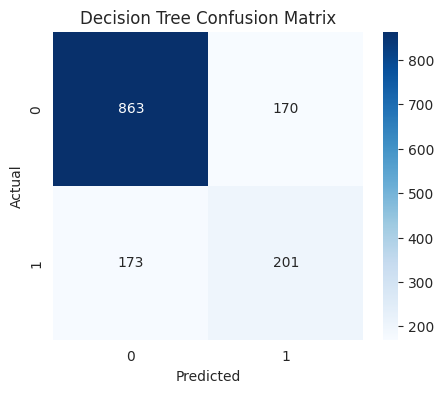

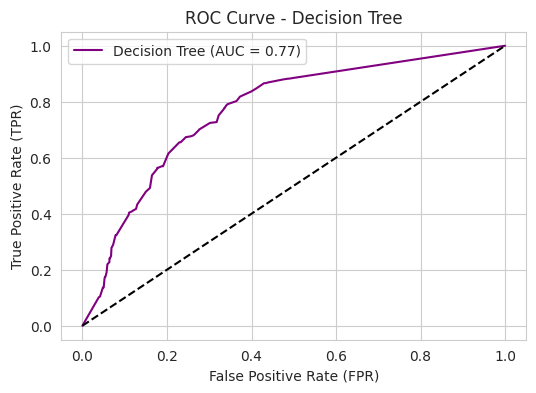


Neural Network Evaluation
Accuracy: 0.775408670931059

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.58      0.54      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



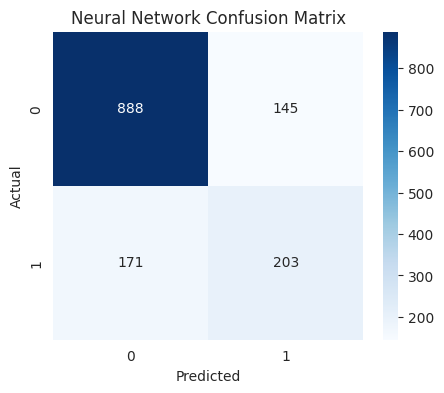

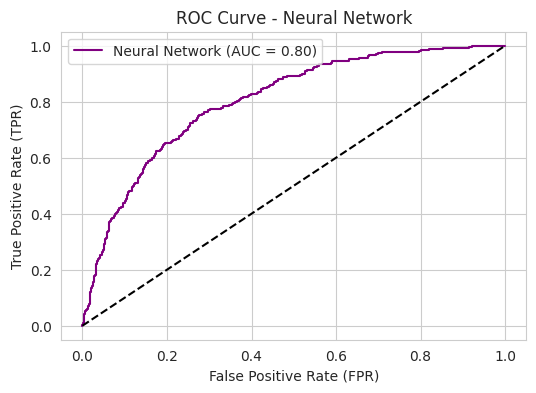

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# --- (2.4)Evaluation --- #

def plot_roc_curve(model, X_test, y_test, model_name): #ROC
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', color='purple')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

def evaluate_model(model, name, X_test, y_test): #confusion matrix
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


evaluate_model(best_dt, "Decision Tree", X_test, y_test)
print()
plot_roc_curve(best_dt, X_test, y_test, "Decision Tree")
evaluate_model(best_mlp, "Neural Network", X_test, y_test)
print()
plot_roc_curve(best_mlp, X_test, y_test, "Neural Network")